Processing blog with 40 words

Category: Tech
Confidence: 0.92


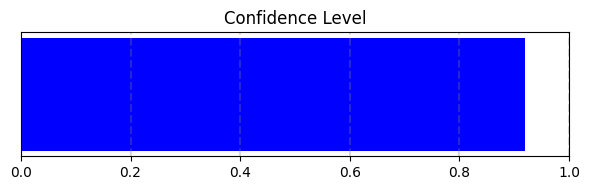

In [43]:
import groq
import matplotlib.pyplot as plt

with open("api_key.env", "r") as f:
    for line in f:
        if line.startswith("GROQ_API_KEY="):
            api_key = line.strip().split("=", 1)[1]
            break

client = groq.Groq(api_key=api_key)

def classify_blog(content):
    """Classifying blog content using Groq API client"""
    examples = """
Blog: The new iPhone has impressive camera capabilities with its 48MP main sensor.
Category: Tech
Confidence: 0.95

Blog: Recent studies suggest that intermittent fasting may have benefits beyond weight loss.
Category: Health
Confidence: 0.90

Blog: The Federal Reserve's decision to raise interest rates signals their commitment to fighting inflation.
Category: Finance
Confidence: 0.88
"""
    prompt = f"""Classify this blog into a category like the above examples and Only and Only give me its Category and then confidence without any more explanation.

Give a confidence score between 0 and 1 based on these guidelines:
- 0.9-1.0: Very clear match with strong category-specific terminology
- 0.7-0.9: Good match with some category-specific terms
- 0.5-0.7: Moderate match with mixed content
- 0.3-0.5: Weak match with only slight relation to category
- 0.0-0.3: Very weak match

    {examples}

Blog: {content}
"""

    try:
        response = client.chat.completions.create(
            model="meta-llama/llama-4-scout-17b-16e-instruct",
            messages=[{"role": "user", "content": prompt}]
        )
        text_response = response.choices[0].message.content
        lines = text_response.strip().split('\n')
        guessed_category = lines[0].replace('Category:', '').strip()
        confidence_value = float(lines[1].replace('Confidence:', '').strip())

        return guessed_category, confidence_value
    except Exception as e:
        print(f"API error: {type(e).__name__} - {e}")
        return "Unknown", 0.0

#USER INPUT
blog_content = input("Enter your blog content: ")
print(f"Processing blog with {len(blog_content.split())} words")

category, confidence = classify_blog(blog_content)

#OUTPUT
print(f"\nCategory: {category}")
print(f"Confidence: {confidence:.2f}")
plt.figure(figsize=(6, 2))
plt.barh(0, confidence, color='blue')
plt.xlim(0, 1)
plt.yticks([])
plt.title('Confidence Level')
for i in [0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

The blog pasted above was
"Breakthrough in material science yields self-healing concrete incorporating specialized bacteria. When microcracks form, capsules rupture and bacteria consume calcium-rich nutrients, producing limestone that repairs damage automatically. Infrastructure lifespans could potentially double, dramatically reducing maintenance costs and environmental impact of construction."
Its category is 'Science' but models detects it as 'Tech' that too with and confidence of '0.92' which is clearly wrong.

Processing blog with 40 words

Category: Science
Confidence: 0.98


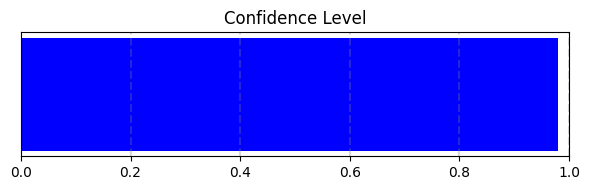

In [42]:
import groq
import matplotlib.pyplot as plt
with open("api_key.env", "r") as f:
    for line in f:
        if line.startswith("GROQ_API_KEY="):
            api_key = line.strip().split("=", 1)[1]
            break

client = groq.Groq(api_key=api_key)

def classify_blog(content):
    """Classifying blog content using Groq API client"""
    examples = """
Blog: The new iPhone has impressive camera capabilities with its 48MP main sensor. The A16 Bionic chip delivers exceptional performance for mobile gaming and augmented reality applications.
Category: Tech
Confidence: 0.95

Blog: Recent studies suggest that intermittent fasting may have benefits beyond weight loss, including improved insulin sensitivity and cellular repair processes called autophagy.
Category: Health
Confidence: 0.90

Blog: The Federal Reserve's decision to raise interest rates signals their commitment to fighting inflation despite concerns about economic growth slowdown.
Category: Finance
Confidence: 0.88

Blog: Barcelona offers stunning architecture, vibrant street life, and beautiful beaches. The Sagrada Familia and Park Güell showcase Gaudí's unique vision.
Category: Travel
Confidence: 0.93

Blog: The fusion of traditional Mexican flavors with modern culinary techniques is creating exciting new dishes that honor heritage while innovating.
Category: Food
Confidence: 0.89
"""
    prompt = f"""Classify this blog into the most appropriate category based on its main topic and focus.

First read the entire content carefully, understanding:
- Understand the primary topic that is given
- Terminology used in it
- The overall meaning of the content

When choosing a category, consider what field or domain the content primarily belongs to. If it covers multiple topics, select the one that fits the discussion most.

Give a confidence score between 0 and 1 based on these guidelines:
- 0.9-1.0: Very clear match with specialized terminology and focused entirely on this topic
- 0.7-0.9: Strong match with topic-specific terms and primarily about this subject
- 0.5-0.7: Moderate match with some relevant terminology and significant focus on this topic
- 0.3-0.5: Weak match with minimal specific terminology and only partial focus on topic
- 0.0-0.3: Very weak match with little relation to the category

Return ONLY the category name and confidence score in this exact format:
Category: [category]
Confidence: [number]

Examples:
{examples}

Blog: {content}
"""

    try:
        response = client.chat.completions.create(
            model="meta-llama/llama-4-scout-17b-16e-instruct",
            messages=[{"role": "user", "content": prompt}]
        )

        text_response = response.choices[0].message.content

        lines = text_response.strip().split('\n')
        ctg = lines[0].replace('Category:', '').strip()
        cfd = float(lines[1].replace('Confidence:', '').strip())
        return ctg, cfd
    except Exception as e:
        print(f"API error: {type(e).__name__} - {e}")
        return "Unknown", 0.0
#INPUT
blog_content = input("Enter your blog content: ")
print(f"Processing blog with {len(blog_content.split())} words")

category, confidence = classify_blog(blog_content)

#OUTPUT
print(f"\nCategory: {category}")
print(f"Confidence: {confidence:.2f}")
plt.figure(figsize=(6, 2))
plt.barh(0, confidence, color='blue')
plt.xlim(0, 1)
plt.yticks([])
plt.title('Confidence Level')
for i in [0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.axvline(x=i, color='gray', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

The blog which was pasted above was
"Breakthrough in material science yields self-healing concrete incorporating specialized bacteria. When microcracks form, capsules rupture and bacteria consume calcium-rich nutrients, producing limestone that repairs damage automatically. Infrastructure lifespans could potentially double, dramatically reducing maintenance costs and environmental impact of construction."
Its category is 'Science' and the model detects it as 'Science' that too with and confidence of '0.98' which is very accurate.

**CONCLUSION**
--Both the code blocks use the same model as well as the same API but produce different results, WHY?
The answer lays in the prompt which was given to both the code block which was different. The first code block has a simple prompt which then returns a value without analyzing the category it gave very well whereas the second code block is given a much detailed prompt which allows it to detect the category more thoroughly making it more accurate.
Still there may be scenarios where due to limited traffic and temperature the smaller prompt may be favourable as it is almost as accurate as the second code block when defining the common blog topics.
This provides us with a conclusion of how a simple prompt can change the outcome of the model highly making it seem less accurate when it may not be dependent on it in the first place.